In [50]:
import pandas as pd
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from nilearn import plotting
from nilearn.image import mean_img, index_img

Importing DATA

In [51]:
# importing data
run1_raw = nib.load(r'D:\research\mentoring\python_fMRI\first_week\sub_2\Func\Run_1\sub-02_ses-mri_task-facerecognition_run-01_bold.nii')
run1_pre = nib.load(r'D:\research\mentoring\python_fMRI\first_week\sub_2\Func\Run_1\warsub-02_ses-mri_task-facerecognition_run-01_bold.nii')
run2_raw = nib.load(r'D:\research\mentoring\python_fMRI\first_week\sub_2\Func\Run_2\sub-02_ses-mri_task-facerecognition_run-02_bold.nii')
run2_pre = nib.load(r'D:\research\mentoring\python_fMRI\first_week\sub_2\Func\Run_2\warsub-02_ses-mri_task-facerecognition_run-02_bold.nii')
anat = nib.load(r'D:\research\mentoring\python_fMRI\first_week\sub_2\Anut\sub-02_ses-mri_acq-mprage_T1w.nii')

Visualizing 

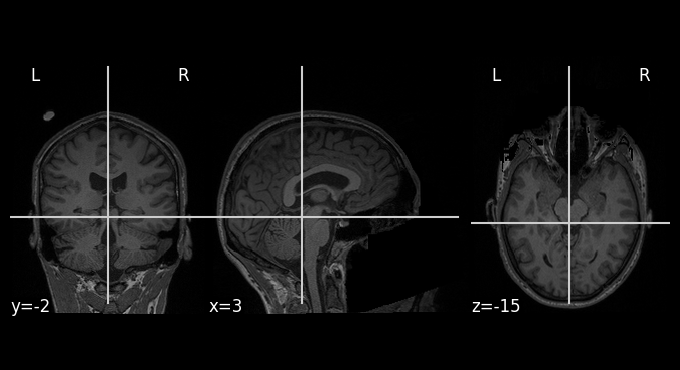

In [52]:
# plotting anatomical 
plotting.plot_anat(anat)

'\nQuestion!\nwhy the  x,y,z in the to pre and raw are different?\n'

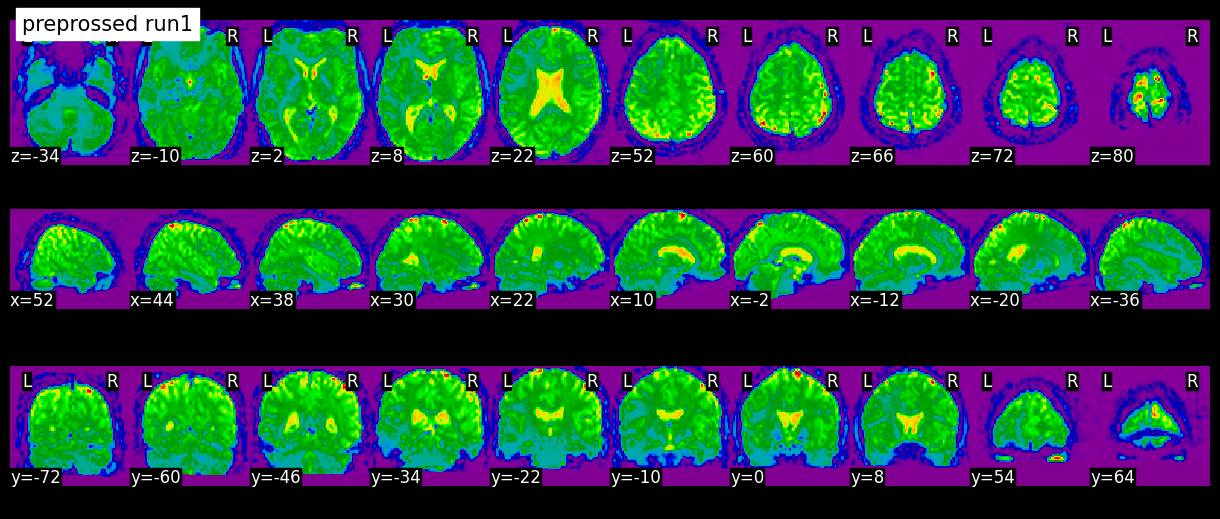

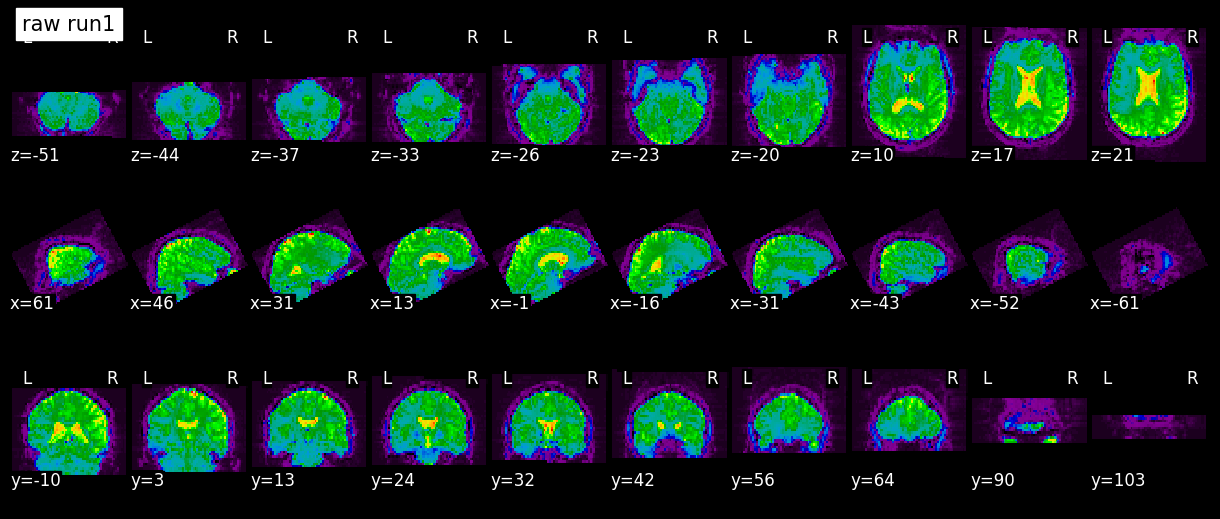

In [53]:
# ploting run1 pre vs raw 
plotting.plot_epi(mean_img(run1_pre), cut_coords = [10,10,10], display_mode = 'mosaic', title='preprossed run1')
plotting.plot_epi(mean_img(run1_raw), cut_coords = [10,10,10], display_mode = 'mosaic', title='raw run1')
'''
Question!
why the  x,y,z in the to pre and raw are different?
'''

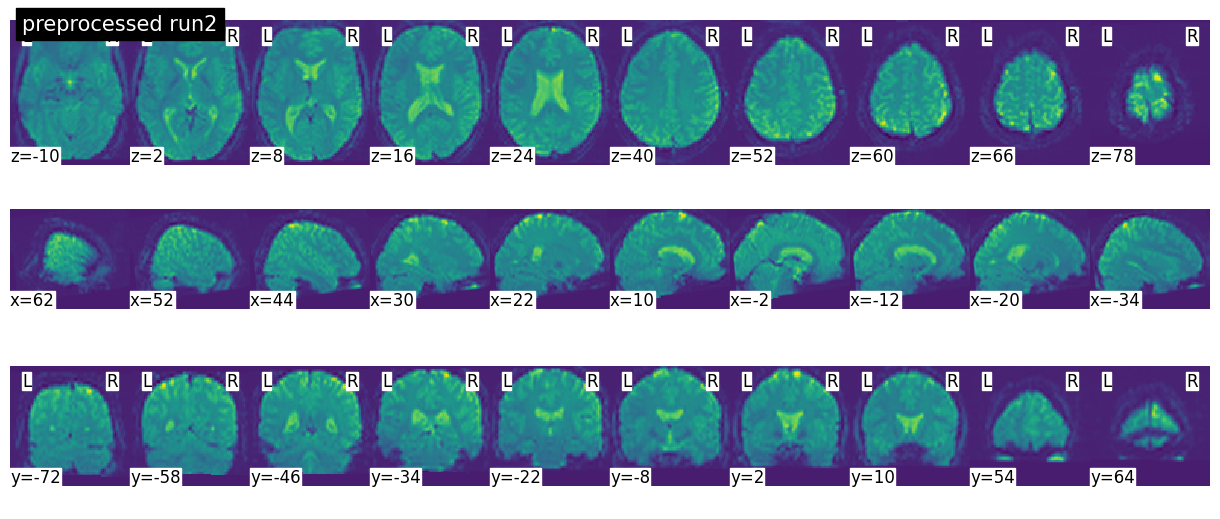

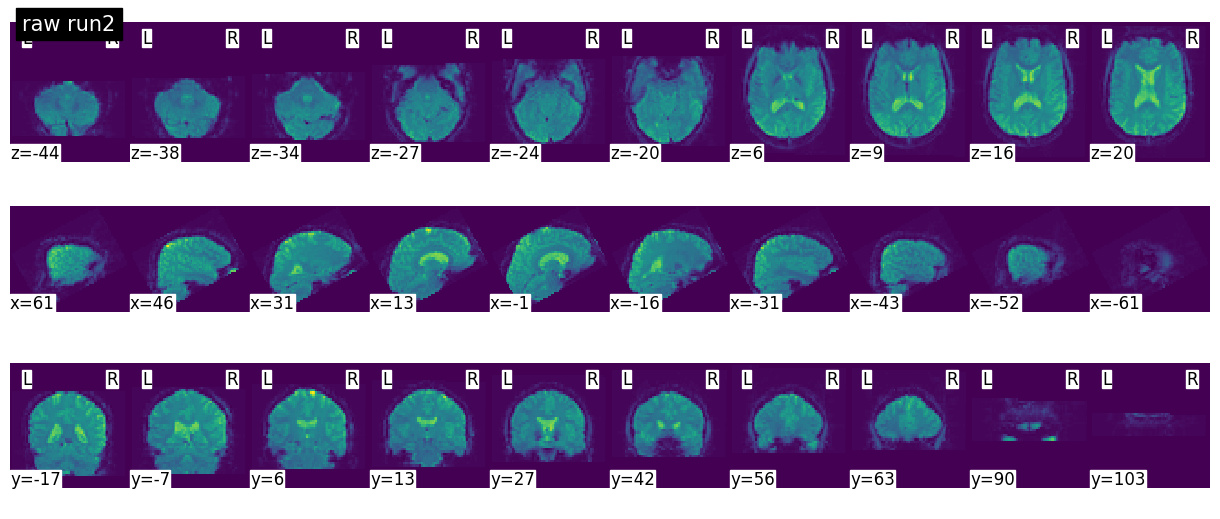

In [54]:
# ploting run2 pre vs raw 
plotting.plot_img(mean_img(run2_pre), cut_coords = [10,10,10], display_mode = 'mosaic', title = 'preprocessed run2')
plotting.plot_img(mean_img(run2_raw), cut_coords = [10,10,10], display_mode = 'mosaic', title='raw run2')

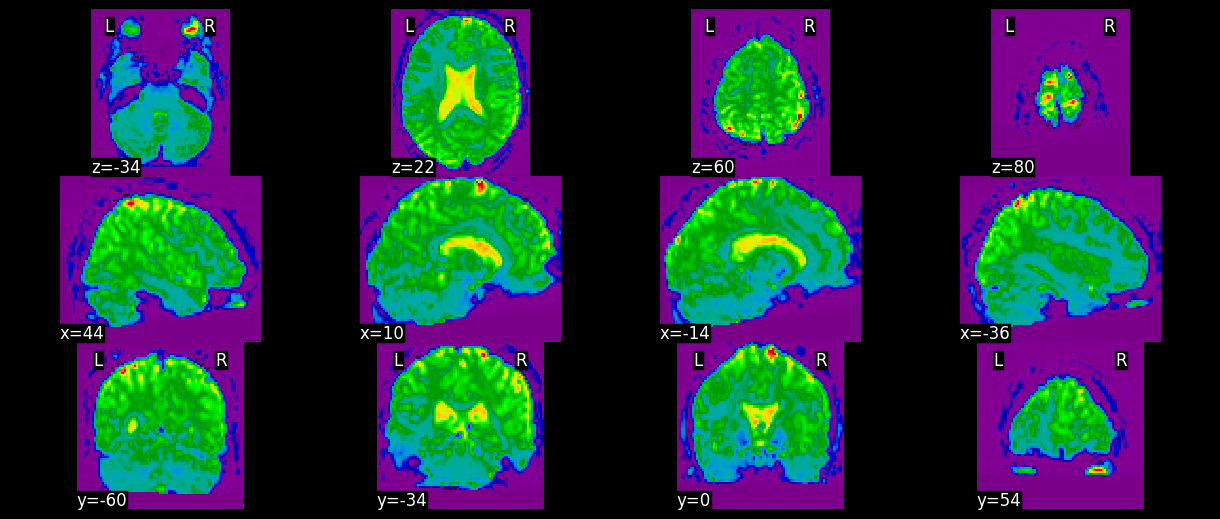

In [55]:
# visualizing volume 1 
vol_run1_pre = index_img(run1_pre, 1)
plotting.plot_epi(vol_run1_pre, cut_coords=[4, 4, 4], display_mode = 'mosaic')

getting data

In [56]:
data_run1_pre= run1_pre.get_fdata() 
data_run1_raw=run1_raw.get_fdata()
data_run2_pre=run2_pre.get_fdata()
data_run2_raw=run2_raw.get_fdata()

In [57]:
# data shape 
data_run1_pre.shape

(79, 95, 79, 208)

In [58]:
# specific interest_vol 
interest_vol = data_run1_pre[10, 11, :]

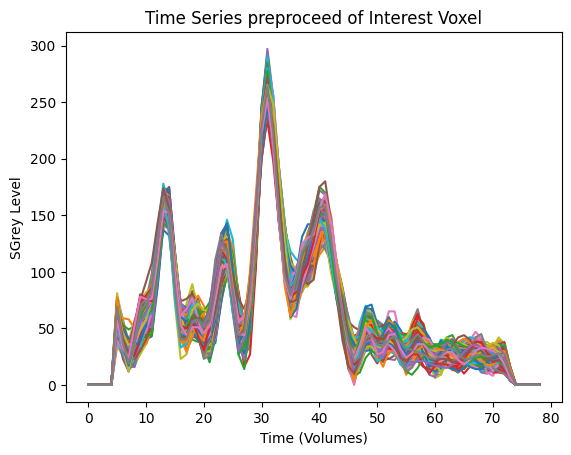

'\nQiestio?\nchera chand ta rang dare?\n'

In [59]:
#ploting pre proced interest_vol 
plt.plot(interest_vol)
plt.title(f'Time Series preproceed of Interest Voxel')
plt.xlabel('Time (Volumes)')
plt.ylabel('SGrey Level')
plt.show()
'''
Qiestio?
chera chand ta rang dare?
'''

'\nQueztion \nwhy two plots ? \n'

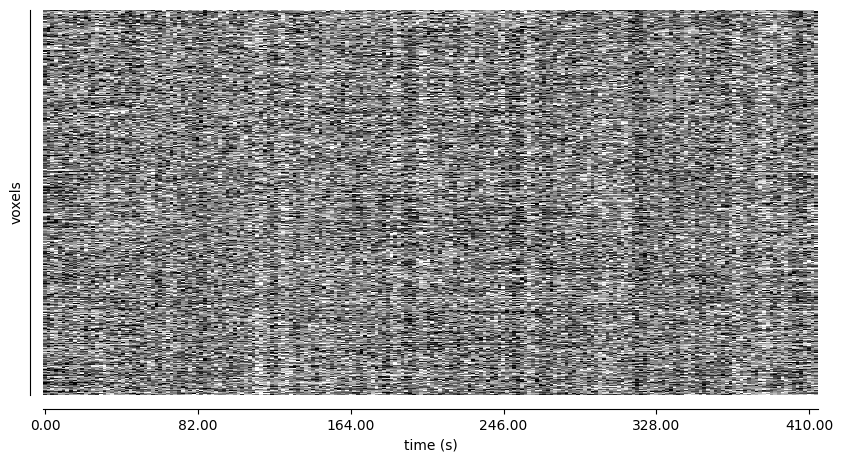

In [74]:
plotting.plot_carpet(run1_pre,t_r = 2)

getting data 

In [61]:
# header 
print(run2_raw.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : np.bytes_(b'')
db_name         : np.bytes_(b'')
extents         : 0
session_error   : 0
regular         : np.bytes_(b'r')
dim_info        : 0
dim             : [  4  64  64  33 208   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.         2.9999993  3.0000007  3.8999999  2.         0.
  0.         0.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : np.bytes_(b'3T 2D EP TR=2000ms/TE=30ms/FA=78deg ')
aux_file        : np.bytes_(b'')
qform_code      : aligned
sform_code      : aligned
quatern_b       : -0.0053901444
quater

In [62]:
# affining 
run2_raw.affine

array([[-2.99972057e+00,  3.75284553e-02,  2.11349726e-02,
         1.00165306e+02],
       [ 2.51414180e-02,  2.63266039e+00, -1.86968327e+00,
        -4.66350708e+01],
       [ 3.22582722e-02,  1.43794823e+00,  3.42254829e+00,
        -8.25593948e+01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

In [63]:
#shape 
run1_raw.shape

(64, 64, 33, 208)

In [64]:
tr = 2.0  
n_scans = run1_raw.shape[3] 
frame_times = np.arange(n_scans) * tr 

Event 

In [65]:
events1= pd.read_table(r'D:\research\mentoring\python_fMRI\first_week\sub_2\Func\Run_1\sub-02_ses-mri_task-facerecognition_run-01_events.tsv')
events2= pd.read_table(r'D:\research\mentoring\python_fMRI\first_week\sub_2\Func\Run_2\sub-02_ses-mri_task-facerecognition_run-02_events.tsv')

In [66]:
events1

,onset,duration,circle_duration,stim_type,trigger,button_pushed,response_time,stim_file
0,0.000,0.851,0.585,UNFAMILIAR,13,7,1.314,func/u015.bmp
1,3.056,0.812,0.447,UNFAMILIAR,14,7,0.978,func/u015.bmp
2,6.364,0.915,0.580,UNFAMILIAR,13,7,0.870,func/u012.bmp
3,9.604,0.940,0.514,UNFAMILIAR,13,4,0.754,func/u007.bmp
4,12.828,0.985,0.515,UNFAMILIAR,13,7,0.753,func/u013.bmp
...,...,...,...,...,...,...,...,...
94,382.753,0.894,0.519,SCRAMBLED,17,7,0.846,func/s013.bmp
95,385.943,0.850,0.528,SCRAMBLED,17,4,0.987,func/s003.bmp
96,388.951,0.830,0.401,SCRAMBLED,18,4,0.603,func/s003.bmp
97,392.057,0.993,0.506,SCRAMBLED,19,7,1.091,func/s006.bmp


In [67]:
events1.rename(columns={'stim_type': 'trial_type'}, inplace=True)
events2.rename(columns={'stim_type': 'trial_type'}, inplace=True)

In [68]:
events1

,onset,duration,circle_duration,trial_type,trigger,button_pushed,response_time,stim_file
0,0.000,0.851,0.585,UNFAMILIAR,13,7,1.314,func/u015.bmp
1,3.056,0.812,0.447,UNFAMILIAR,14,7,0.978,func/u015.bmp
2,6.364,0.915,0.580,UNFAMILIAR,13,7,0.870,func/u012.bmp
3,9.604,0.940,0.514,UNFAMILIAR,13,4,0.754,func/u007.bmp
4,12.828,0.985,0.515,UNFAMILIAR,13,7,0.753,func/u013.bmp
...,...,...,...,...,...,...,...,...
94,382.753,0.894,0.519,SCRAMBLED,17,7,0.846,func/s013.bmp
95,385.943,0.850,0.528,SCRAMBLED,17,4,0.987,func/s003.bmp
96,388.951,0.830,0.401,SCRAMBLED,18,4,0.603,func/s003.bmp
97,392.057,0.993,0.506,SCRAMBLED,19,7,1.091,func/s006.bmp


In [69]:
events1['trial_type'] = events1['trial_type'].fillna('rest')
events1

,onset,duration,circle_duration,trial_type,trigger,button_pushed,response_time,stim_file
0,0.000,0.851,0.585,UNFAMILIAR,13,7,1.314,func/u015.bmp
1,3.056,0.812,0.447,UNFAMILIAR,14,7,0.978,func/u015.bmp
2,6.364,0.915,0.580,UNFAMILIAR,13,7,0.870,func/u012.bmp
3,9.604,0.940,0.514,UNFAMILIAR,13,4,0.754,func/u007.bmp
4,12.828,0.985,0.515,UNFAMILIAR,13,7,0.753,func/u013.bmp
...,...,...,...,...,...,...,...,...
94,382.753,0.894,0.519,SCRAMBLED,17,7,0.846,func/s013.bmp
95,385.943,0.850,0.528,SCRAMBLED,17,4,0.987,func/s003.bmp
96,388.951,0.830,0.401,SCRAMBLED,18,4,0.603,func/s003.bmp
97,392.057,0.993,0.506,SCRAMBLED,19,7,1.091,func/s006.bmp


In [70]:
events1=events1.dropna()
events2=events2.dropna()

C:\Users\Dorsa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\nilearn\glm\first_level\experimental_paradigm.py:167: UserWarning: The following unexpected columns in events data will be ignored: trigger, circle_duration, response_time, button_pushed, stim_file
  warnings.warn(
C:\Users\Dorsa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\nilearn\glm\first_level\experimental_paradigm.py:167: UserWarning: The following unexpected columns in events data will be ignored: trigger, circle_duration, response_time, button_pushed, stim_file
  warnings.warn(


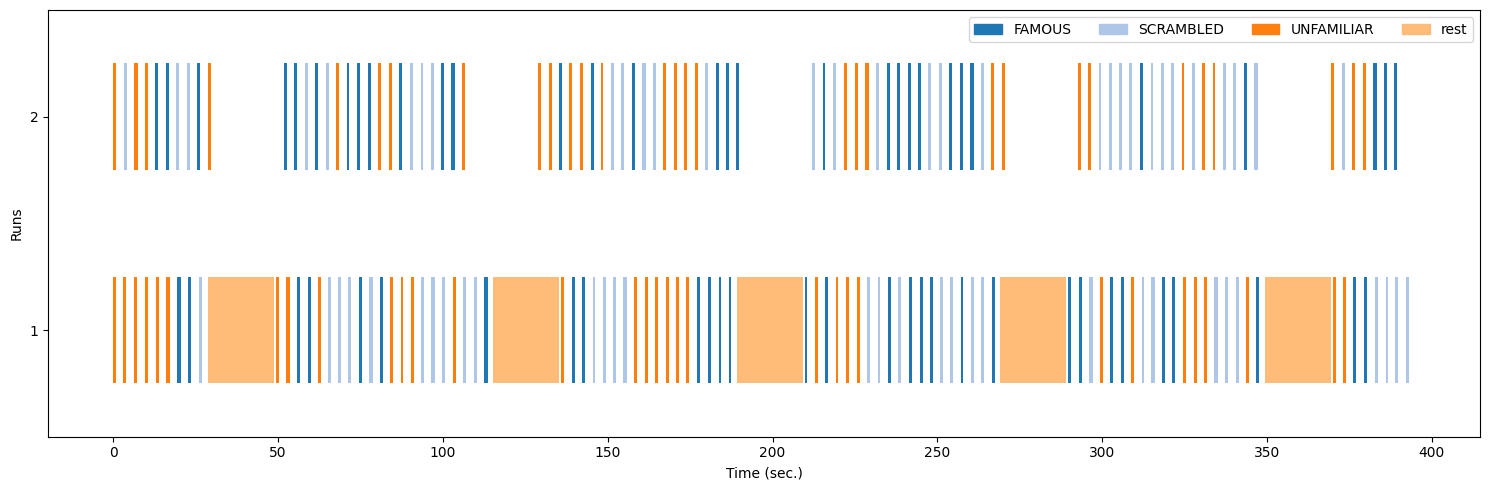

In [71]:
plotting.plot_event([events1 , events2], figsize = (15,5))
plt.show()

In [72]:
events2

,onset,duration,circle_duration,trial_type,trigger,button_pushed,response_time,stim_file
0,0.000,0.875,0.440,UNFAMILIAR,13,7,0.846,func/u031.bmp
1,3.123,0.945,0.481,SCRAMBLED,17,4,0.921,func/s020.bmp
2,6.414,0.949,0.450,UNFAMILIAR,13,4,0.706,func/u027.bmp
3,9.638,0.895,0.503,UNFAMILIAR,14,4,0.581,func/u027.bmp
4,12.778,0.937,0.446,FAMOUS,5,4,0.860,func/f024.bmp
...,...,...,...,...,...,...,...,...
92,375.804,0.992,0.509,UNFAMILIAR,13,4,0.977,func/u025.bmp
93,379.161,0.880,0.586,UNFAMILIAR,15,7,1.003,func/u026.bmp
94,382.252,0.994,0.441,FAMOUS,5,7,0.669,func/f031.bmp
95,385.459,0.821,0.442,FAMOUS,6,7,0.637,func/f031.bmp


In [73]:
events1 = events1[['onset', 'duration', 'trial_type']]
events2 = events2[['onset', 'duration', 'trial_type']]